## Amazon Fashion Sentiment Analysis
* Naive Bayes (Multinomial and Bernoulli)

### Import and Explore Data

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [2]:
# Import data file 
df = pd.read_csv('../Data/user_reviews.csv')
df.head()

,asin,helpful,overall,productid,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00APT3MHO,"[0, 0]",5.0,1,Good for someone who likes skinny jeans but do...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,Love these jeans,1384646400
1,B00CJ5NH36,"[0, 0]",5.0,2,This shirt with it's bold graphic is seriously...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,As cute as it looks,1384646400
2,B00F9NGAPM,"[1, 1]",3.0,4,The shirt is a little flowy-er than I expected...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,"Like, don't love",1384646400
3,B000LYFF46,"[0, 0]",3.0,5,"I selected &#34;fit as expected&#34;, but they...","03 3, 2014",A2YHF6O2D37PMX,DCP,Just not comfortable for me,1393804800
4,B005FPAC8K,"[3, 3]",1.0,6,May 27: I've worn them 3-4 times each since M...,"05 7, 2012",A2YHF6O2D37PMX,DCP,Lowered my rating,1336348800


In [3]:
# Check data (row) and variable (column) number 
print(df.shape)

(358003, 10)


In [4]:
# Check the summary statistics of data 
df.describe(include='all')

,asin,helpful,overall,productid,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
count,358003,358003,358003.00000,358003.000000,357988,358003,358003,357722,358001,3.580030e+05
unique,166270,649,NaN,NaN,357720,2970,45184,39371,217735,NaN
top,B0058XIMMM,"[0, 0]",NaN,NaN,love it,"07 11, 2014",A5QQRB2QOY96U,Amazon Customer,Five Stars,NaN
freq,250,243784,NaN,NaN,15,1128,192,4790,1680,NaN
mean,NaN,NaN,4.14861,56025.569836,NaN,NaN,NaN,NaN,NaN,1.366188e+09
std,NaN,NaN,1.15087,47961.965691,NaN,NaN,NaN,NaN,NaN,4.158841e+07
min,NaN,NaN,1.00000,0.000000,NaN,NaN,NaN,NaN,NaN,1.061856e+09
25%,NaN,NaN,4.00000,13730.500000,NaN,NaN,NaN,NaN,NaN,1.356912e+09
50%,NaN,NaN,5.00000,42522.000000,NaN,NaN,NaN,NaN,NaN,1.378944e+09
75%,NaN,NaN,5.00000,91615.500000,NaN,NaN,NaN,NaN,NaN,1.393718e+09


In [5]:
# Check data type
df.dtypes

asin               object
helpful            object
overall           float64
productid           int64
reviewText         object
reviewTime         object
reviewerID         object
reviewerName       object
summary            object
unixReviewTime      int64
dtype: object

In [6]:
# Check the unique 'productid' number 
len(df['productid'].unique())

166270

In [7]:
# Check the unique 'overall' number 
len(df['overall'].unique())

5

In [8]:
df.dropna()

,asin,helpful,overall,productid,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00APT3MHO,"[0, 0]",5.0,1,Good for someone who likes skinny jeans but do...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,Love these jeans,1384646400
1,B00CJ5NH36,"[0, 0]",5.0,2,This shirt with it's bold graphic is seriously...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,As cute as it looks,1384646400
2,B00F9NGAPM,"[1, 1]",3.0,4,The shirt is a little flowy-er than I expected...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,"Like, don't love",1384646400
3,B000LYFF46,"[0, 0]",3.0,5,"I selected &#34;fit as expected&#34;, but they...","03 3, 2014",A2YHF6O2D37PMX,DCP,Just not comfortable for me,1393804800
4,B005FPAC8K,"[3, 3]",1.0,6,May 27: I've worn them 3-4 times each since M...,"05 7, 2012",A2YHF6O2D37PMX,DCP,Lowered my rating,1336348800
5,B007IL5PW2,"[0, 1]",2.0,7,I wish I could give rating for different quali...,"03 6, 2014",A2YHF6O2D37PMX,DCP,Far too small,1394064000
6,B00DX9QC2K,"[2, 3]",4.0,10,Update 04-09-14: Upgraded from 3 to 4 stars. ...,"03 10, 2014",A2YHF6O2D37PMX,DCP,Nice shoe,1394409600
7,B00DX9SZ7A,"[0, 0]",3.0,11,"They don't fit badly, and I really like Clarks...","03 3, 2014",A2YHF6O2D37PMX,DCP,"Okay, but not for me",1393804800
8,B002MH3OH0,"[0, 0]",5.0,12,"My little girl love these shoes, but they are ...","10 3, 2013",ASSFVTXVRP2TJ,Soto,super nice shoes,1380758400
9,B004AS1GQU,"[1, 3]",5.0,13,"Disse buksene er meget fine p, og lillemor els...","11 5, 2012",ASSFVTXVRP2TJ,Soto,Supert,1352073600


In [9]:
len(df)

358003

In [10]:
# df2 = df["helpful"]
# df2.head()
df2 = pd.DataFrame(df["helpful"])
df2.head()

,helpful
0,"[0, 0]"
1,"[0, 0]"
2,"[1, 1]"
3,"[0, 0]"
4,"[3, 3]"


In [11]:
len(df2)

358003

In [12]:
df3 = df2['helpful'].str.split(expand=True)
df3[0] = df3[0].str[1:-1]
df3[1] = df3[1].str[:-1]
df3.head()

,0,1
0,0,0
1,0,0
2,1,1
3,0,0
4,3,3


In [13]:
df3.rename(index=str, columns={'0': "yes", '1': "no"})
df3.head()

,0,1
0,0,0
1,0,0
2,1,1
3,0,0
4,3,3


In [14]:
df3.columns = ['yes','no']
df3.head()

,yes,no
0,0,0
1,0,0
2,1,1
3,0,0
4,3,3


In [15]:
len(df3)

358003

In [16]:
df4 = df.join(df3)
df4.head()

,asin,helpful,overall,productid,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,yes,no
0,B00APT3MHO,"[0, 0]",5.0,1,Good for someone who likes skinny jeans but do...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,Love these jeans,1384646400,0,0
1,B00CJ5NH36,"[0, 0]",5.0,2,This shirt with it's bold graphic is seriously...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,As cute as it looks,1384646400,0,0
2,B00F9NGAPM,"[1, 1]",3.0,4,The shirt is a little flowy-er than I expected...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,"Like, don't love",1384646400,1,1
3,B000LYFF46,"[0, 0]",3.0,5,"I selected &#34;fit as expected&#34;, but they...","03 3, 2014",A2YHF6O2D37PMX,DCP,Just not comfortable for me,1393804800,0,0
4,B005FPAC8K,"[3, 3]",1.0,6,May 27: I've worn them 3-4 times each since M...,"05 7, 2012",A2YHF6O2D37PMX,DCP,Lowered my rating,1336348800,3,3


In [17]:
len(df4)

358003

In [18]:
df4["sentiment"] = df4["overall"].apply(lambda score: "positive" if score > 3 else "negative")
df4.head()

,asin,helpful,overall,productid,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,yes,no,sentiment
0,B00APT3MHO,"[0, 0]",5.0,1,Good for someone who likes skinny jeans but do...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,Love these jeans,1384646400,0,0,positive
1,B00CJ5NH36,"[0, 0]",5.0,2,This shirt with it's bold graphic is seriously...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,As cute as it looks,1384646400,0,0,positive
2,B00F9NGAPM,"[1, 1]",3.0,4,The shirt is a little flowy-er than I expected...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,"Like, don't love",1384646400,1,1,negative
3,B000LYFF46,"[0, 0]",3.0,5,"I selected &#34;fit as expected&#34;, but they...","03 3, 2014",A2YHF6O2D37PMX,DCP,Just not comfortable for me,1393804800,0,0,negative
4,B005FPAC8K,"[3, 3]",1.0,6,May 27: I've worn them 3-4 times each since M...,"05 7, 2012",A2YHF6O2D37PMX,DCP,Lowered my rating,1336348800,3,3,negative


In [19]:
df4['yes'] = pd.to_numeric(df4['yes'], errors='coerce')
df4['no'] = pd.to_numeric(df4['no'], errors='coerce')

df4["usefulScore"] = (df4["yes"]/df4["no"]).apply(lambda n: "useful" if n > 0.8 else "useless")
df4.head()

,asin,helpful,overall,productid,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,yes,no,sentiment,usefulScore
0,B00APT3MHO,"[0, 0]",5.0,1,Good for someone who likes skinny jeans but do...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,Love these jeans,1384646400,0,0,positive,useless
1,B00CJ5NH36,"[0, 0]",5.0,2,This shirt with it's bold graphic is seriously...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,As cute as it looks,1384646400,0,0,positive,useless
2,B00F9NGAPM,"[1, 1]",3.0,4,The shirt is a little flowy-er than I expected...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,"Like, don't love",1384646400,1,1,negative,useful
3,B000LYFF46,"[0, 0]",3.0,5,"I selected &#34;fit as expected&#34;, but they...","03 3, 2014",A2YHF6O2D37PMX,DCP,Just not comfortable for me,1393804800,0,0,negative,useless
4,B005FPAC8K,"[3, 3]",1.0,6,May 27: I've worn them 3-4 times each since M...,"05 7, 2012",A2YHF6O2D37PMX,DCP,Lowered my rating,1336348800,3,3,negative,useful


In [20]:
# Rows having overall score equal to 5
df4[df4.overall == 5].head()

,asin,helpful,overall,productid,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,yes,no,sentiment,usefulScore
0,B00APT3MHO,"[0, 0]",5.0,1,Good for someone who likes skinny jeans but do...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,Love these jeans,1384646400,0,0,positive,useless
1,B00CJ5NH36,"[0, 0]",5.0,2,This shirt with it's bold graphic is seriously...,"11 17, 2013",A1JWX45KHE34AL,varnienarsil,As cute as it looks,1384646400,0,0,positive,useless
8,B002MH3OH0,"[0, 0]",5.0,12,"My little girl love these shoes, but they are ...","10 3, 2013",ASSFVTXVRP2TJ,Soto,super nice shoes,1380758400,0,0,positive,useless
9,B004AS1GQU,"[1, 3]",5.0,13,"Disse buksene er meget fine p, og lillemor els...","11 5, 2012",ASSFVTXVRP2TJ,Soto,Supert,1352073600,1,3,positive,useless
10,B004WK8RQS,"[0, 0]",5.0,14,"My girl loves these slippers, they look good a...","03 3, 2014",ASSFVTXVRP2TJ,Soto,nice slippers,1393804800,0,0,positive,useless


In [21]:
# Rows having overall score equal to 1
df4[df4.overall == 1].head()

,asin,helpful,overall,productid,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,yes,no,sentiment,usefulScore
4,B005FPAC8K,"[3, 3]",1.0,6,May 27: I've worn them 3-4 times each since M...,"05 7, 2012",A2YHF6O2D37PMX,DCP,Lowered my rating,1336348800,3,3,negative,useful
28,B00BELY3JI,"[1, 1]",1.0,39,Small size for this dress. Does'nt look like ...,"07 21, 2013",A2TQIYMK44VB7X,monica,Giant Pink Candy,1374364800,1,1,negative,useful
69,B00C513IA6,"[0, 0]",1.0,85,Just for a Bling Button would you really consi...,"03 28, 2014",A1P2T7WWTI9LX5,"Dianeshare1 ""share the joy""",I have four pairs of mini bailey button and I ...,1395964800,0,0,negative,useless
82,B004AZXOJK,"[0, 1]",1.0,100,"A very cheap product, hated it and made it a d...","12 22, 2012",A1Q667Y8I9QIIR,Sushil,Very cheap!,1356134400,0,1,negative,useless
110,B000V9T1KK,"[1, 2]",1.0,136,I would love to order these but the medium len...,"11 24, 2013",A2OLJU8M0L4YZD,Sharon Perry,Wish they were in Long length!,1385251200,1,2,negative,useless


### Feature extraction from reviews Text

In [22]:
# Assign new dimension to each word and give the word counts

regEx = re.compile('[^a-z]+')

def cleanReviews(reviewText):
    reviewText = str(reviewText).lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

df4["summaryClean"] = df4["summary"].apply(cleanReviews)

train, test = train_test_split(df4, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

286402 items in training data, 71601 in test data


In [23]:
# Using TfidfTransformer().fit_transform to fit the train and test data

countVector = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = countVector.fit_transform(train["summaryClean"])

#applying tfidf to term frequency
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = countVector.transform(test["summaryClean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["sentiment"]
y_test = test["sentiment"]

prediction = dict()


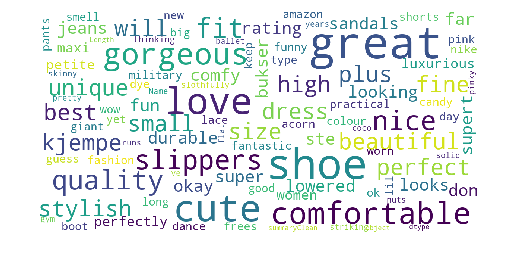

In [24]:
stopwords = set(STOPWORDS)

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df4["summaryClean"])


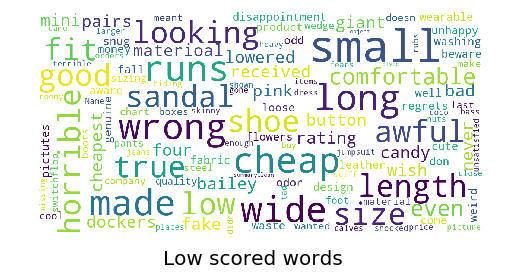

In [25]:
show_wordcloud(df4[df4.overall == 1]["summaryClean"], title = "Low scored words")


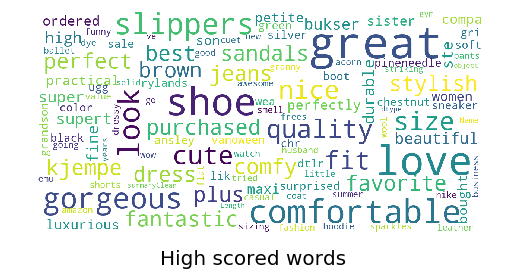

In [26]:
show_wordcloud(df4[df4.overall == 5]["summaryClean"], title = "High scored words")


### Models

In [27]:
# Multinomial Naïve Bayes learning method
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

In [28]:
# Bernoulli Naïve Bayes learning method
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

In [29]:
# Logistic regression learning method
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

C:\Users\khanhdi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khanhdi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Results

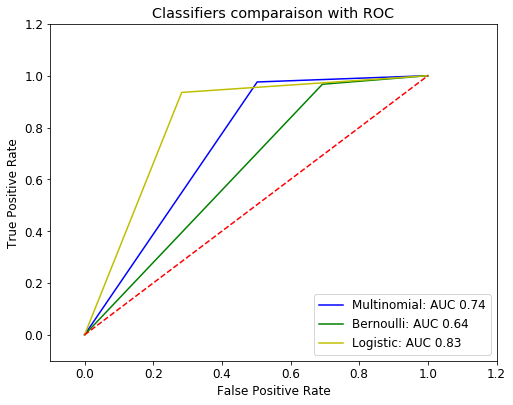

In [30]:
def formatt(x):
    if x == 'negative':
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.map(formatt), vfunc(predicted))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Visualize the accuracy, recall and f1-score for Logistic Regression

In [31]:

print(metrics.classification_report(y_test, prediction['Logistic'], target_names = ["positive", "negative"]))


              precision    recall  f1-score   support

    positive       0.77      0.72      0.74     16953
    negative       0.91      0.94      0.92     54648

   micro avg       0.88      0.88      0.88     71601
   macro avg       0.84      0.83      0.83     71601
weighted avg       0.88      0.88      0.88     71601



In [32]:
accuracy_score(y_test, prediction['Logistic'])

0.8836887752964344

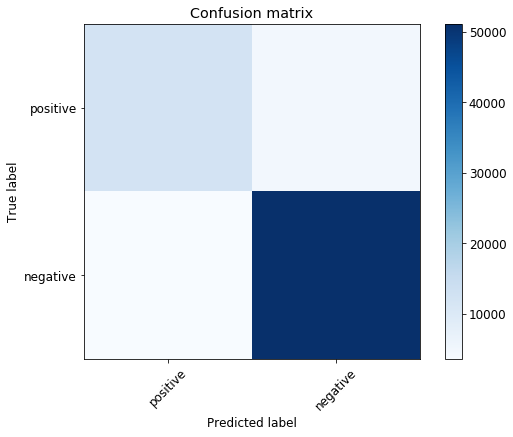

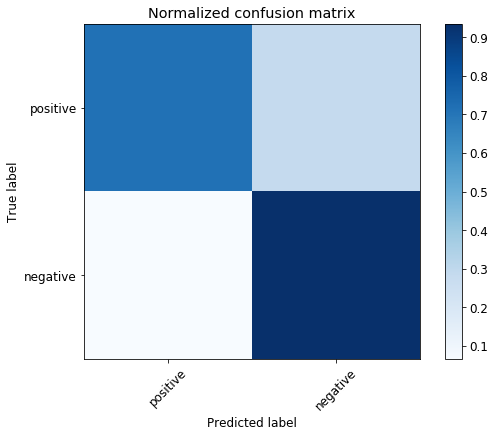

In [33]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()


### Visualize the accuracy, recall and f1-score for Naive Bayes Multinomial

In [34]:
print(metrics.classification_report(y_test, prediction['Multinomial'], target_names = ["positive", "negative"]))


              precision    recall  f1-score   support

    positive       0.86      0.50      0.63     16953
    negative       0.86      0.98      0.92     54648

   micro avg       0.86      0.86      0.86     71601
   macro avg       0.86      0.74      0.77     71601
weighted avg       0.86      0.86      0.85     71601



In [35]:
accuracy_score(y_test, prediction['Multinomial'])


0.8624460552226925

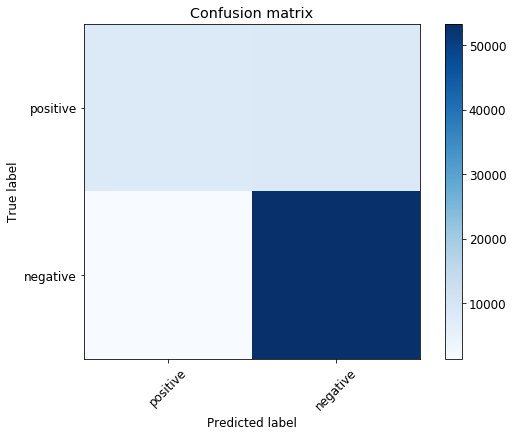

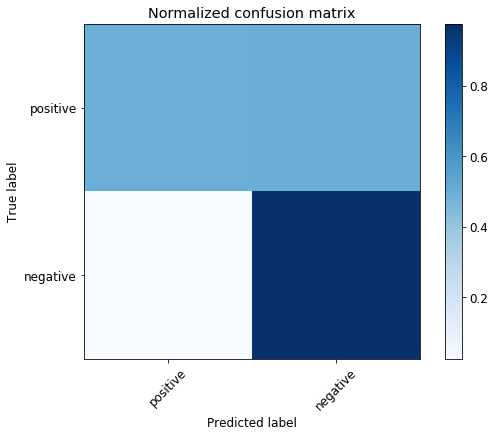

In [36]:
def plot_confusion_matrix(matrix, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
matrix = confusion_matrix(y_test, prediction['Multinomial'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(matrix)    

matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(matrix_normalized, title='Normalized confusion matrix')
plt.show()


### Displaying words depicting the best and worst features using Logistic Model (since it gave the best results)

In [37]:
features = countVector.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(features, logreg_result.coef_[0])),
    columns = ['feature', 'coefficient'])

feature_coefs.sort_values(by='coefficient')


,feature,coefficient
388636,not,-18.964569
663758,worst,-16.445072
436944,poor,-14.567024
43206,awful,-14.509211
551051,terrible,-14.399813
437458,poorly,-14.290622
152896,disappointing,-13.477400
264316,horrible,-12.208954
340015,low quality,-11.577424
102457,cheap,-11.283521


### Testing the sentiments of few reviews

In [38]:
def testSentiments(model, testData):
    testCounts = countVector.transform([testData])
    testTfidf = tfidf_transformer.transform(testCounts)
    result = model.predict(testTfidf)[0]
    probability = model.predict_proba(testTfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), probability[0], probability[1]))

testSentiments(logreg, "Heavenly Highway Hymns")
testSentiments(logreg, "Very oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive.")
testSentiments(logreg, "Nasty smelling shampoo!.")
testSentiments(logreg, "Not disappointed")



Sample estimated as POSITIVE: negative prob 0.006188, positive prob 0.993812
Sample estimated as NEGATIVE: negative prob 0.993196, positive prob 0.006804
Sample estimated as NEGATIVE: negative prob 0.675717, positive prob 0.324283
Sample estimated as POSITIVE: negative prob 0.017109, positive prob 0.982891
